In [139]:
linesCodeAnalyzer = None
with open('CodeJamCrawler/dataset_csvs/code_analyzer_out_sorted.csv', 'r') as f:
    linesCodeAnalyzer = f.readlines()
    
codeAnalyzerHeader = linesCodeAnalyzer[0]
linesCodeAnalyzer = linesCodeAnalyzer[1:]
print (linesCodeAnalyzer[0])

linesCccc = None
with open('CodeJamCrawler/dataset_csvs/cccc_cleared.csv', 'r') as f:
    linesCccc = f.readlines()
    
ccccHeader = linesCccc[0]
linesCccc = linesCccc[1:]
    
print (linesCccc[0])

0.0_14_16505_55.cpp,1,49,13,47,0,2,23.50,0.00,23.50,0.96,47,0,2

0.0_14_16505_55.csv;1;43;43.000;12;12.000;0;0.000;******;******;0;0.000;0;0.000;0;0.000;3



In [140]:
def get_file_name(line, splitter):
    entries = line.split(splitter)
    file_name = entries[0][0:-4]
    return file_name

In [141]:
print (get_file_name(linesCodeAnalyzer[0], ','))
print (get_file_name(linesCccc[0], ';'))

0.0_14_16505_55
0.0_14_16505_55


In [142]:
# removing all the entries that aren't existing in outputCleared
chunk = 200 # the most codes has the "Eryx" person, 159, chunk is a big bigger for safety

cpp_files_only = []
for i in range(len(linesCodeAnalyzer)):
    if i % 1000 == 0:
        print (i)
    other = linesCodeAnalyzer[i]
    file_name_other = get_file_name(other, ',')
    found = False
    for cleared in linesCccc[i:i+chunk]:
        file_name_cleared = get_file_name(cleared, ';')
        if file_name_cleared == file_name_other:
            found = True
            break
    if not found:
        continue
    cpp_files_only.append(file_name_other)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000


In [143]:
print (cpp_files_only[0])

0.0_14_16505_55


In [144]:
print ('code anal', codeAnalyzerHeader)
print ('cccc', ccccHeader)

code anal #File Name,Files,Lines,AVG Len,Code,Comments,White SP,Cd/Cm+WS,Cd/Cm,Cd/WS,% Code,Cd/File,Cm/File,WS/File,

cccc #filename;number_of_modules;lines_of_code;lines_of_code_per_module;McCabes_cyclomatic_complexity;McCabes_cyclomatic_complexity_per_module;lines_of_comment;lines_of_comment_per_module;lines_of_code_per_line_of_comment;McCabes_cyclomatic_complexity_per_line_of_comment;IF4;IF4_per_module;IF4_visible;IF4_visible_per_module;IF4_concrete;IF4_concrete;rejected_lines_of_code



In [145]:
import numpy as np

def parse_cccc(cccc_line):
    name = get_file_name(cccc_line, ';')
    res = name.split('_')[-1]
    author = name.split('_')[0]
    features = []
    for num in cccc_line.split(';')[1:]:
        if num == '******' or num == '------':
            num = '0.0'
        try:
            features.append(float(num))
        except ValueError:
            print (num)
            break
    return author, features, res


In [146]:
def parse_code_analyzer(code_anal_line):
    name = get_file_name(code_anal_line, ',')
    res = name.split('_')[-1]
    author = name.split('_')[0]
    features = []
    for num in code_anal_line.split(',')[1:]:
        try:
            features.append(float(num))
        except ValueError:
            print (num)
            break
    return author, features, res

In [147]:
print ('cccc line vec', parse_cccc(linesCccc[0]))
print ('code line vec', parse_code_analyzer(linesCodeAnalyzer[0]))

cccc line vec ('0.0', [1.0, 43.0, 43.0, 12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0], '55')
code line vec ('0.0', [1.0, 49.0, 13.0, 47.0, 0.0, 2.0, 23.5, 0.0, 23.5, 0.96, 47.0, 0.0, 2.0], '55')


In [148]:
cpp_files_map = set()

for n in cpp_files_only:
    cpp_files_map.add(n.split('_')[0])

src_vec_map = {}

for cccc_line in linesCccc:
    name, features, res = parse_cccc(cccc_line)
    if name not in src_vec_map:
        src_vec_map[name] = [(features,res)]
    else:
        src_vec_map[name].append((features, res))

for code_anal_line in linesCodeAnalyzer:
    name, features, res = parse_code_analyzer(code_anal_line)
    if name in cpp_files_map:
        src_vec_map[name].append((features, res))

In [149]:
print (len(src_vec_map["4TShirt"]))
for v in src_vec_map["4TShirt"] :
    print (v)

54
([1.0, 74.0, 74.0, 16.0, 16.0, 47.0, 47.0, 1.574, 0.34, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], '55')
([1.0, 74.0, 74.0, 16.0, 16.0, 47.0, 47.0, 1.574, 0.34, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], '55')
([1.0, 85.0, 85.0, 18.0, 18.0, 47.0, 47.0, 1.809, 0.383, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0], '55')
([1.0, 47.0, 47.0, 10.0, 10.0, 46.0, 46.0, 1.022, 0.217, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], '55')
([1.0, 28.0, 28.0, 4.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], '55')
([1.0, 55.0, 55.0, 16.0, 16.0, 3.0, 3.0, 18.333, 5.333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], '6')
([1.0, 97.0, 97.0, 18.0, 18.0, 1.0, 1.0, 97.0, 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0], '20')
([1.0, 97.0, 97.0, 18.0, 18.0, 1.0, 1.0, 97.0, 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0], '20')
([1.0, 63.0, 63.0, 18.0, 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0], '40')
([1.0, 63.0, 63.0, 18.0, 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0], '40')
([1.0, 115.0, 115.0, 20.0, 20.0, 0.0, 0

In [150]:
print (len(src_vec_map))
codes_count = 0
for k in src_vec_map:
    codes_count += len(src_vec_map[k])
    
print ("Number of codes: ", codes_count)

1825
Number of codes:  18788


In [151]:
import random
def load_dataset(src_vec_map):
    dataset_list = []
    for k in src_vec_map:
        i = 0
        half_list = int(len(src_vec_map[k])/2)
        while i < half_list :
            label = src_vec_map[k][i][1]
            #print(label)
            l1 = np.asarray(src_vec_map[k][i][0])
            l2 = np.asarray(src_vec_map[k][i+half_list][0])
            #print (l1.shape, l2.shape)
            l = np.concatenate((l1, l2), axis=0)
            dataset_list.append((l, label))
            i += 1
    dataset = np.array(dataset_list)
    dataset = dataset.reshape((dataset.shape[0], dataset.shape[1]))
    return dataset

In [152]:
print (dataset.shape, "NOTE : first dimension should be same as 18788/2\n\n")
print (dataset[0])

(8934, 2) NOTE : first dimension should be same as 18788/2


[ array([  1.  ,  43.  ,  43.  ,  12.  ,  12.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   3.  ,
         1.  ,  49.  ,  13.  ,  47.  ,   0.  ,   2.  ,  23.5 ,   0.  ,
        23.5 ,   0.96,  47.  ,   0.  ,   2.  ])
 '55']


In [17]:
dim = dataset.shape[1]

y = dataset[:,dim-1]
print y.shape
X = dataset[:, 0:dim-1]
print X.shape

(19153,)
(19153, 29)


In [18]:
print codeAnalyzerHeader.split(',')[1:-1]
cccc_header = 'filename;number_of_modules;lines_of_code;lines_of_code_per_module;McCabes_cyclomatic_complexity;McCabes_cyclomatic_complexity_per_module;lines_of_comment;lines_of_comment_per_module;lines_of_code_per_line_of_comment;McCabes_cyclomatic_complexity_per_line_of_comment;IF4;IF4_per_module;IF4_visible;IF4_visible_per_module;IF4_concrete;IF4_concrete;rejected_lines_of_code'
print cccc_header.split(';')[1:]

labels = cccc_header.split(';')[1:] + codeAnalyzerHeader.split(',')[1:-1]

print len(labels)

['Files', 'Lines', 'AVG Len', 'Code', 'Comments', 'White SP', 'Cd/Cm+WS', 'Cd/Cm', 'Cd/WS', '% Code', 'Cd/File', 'Cm/File', 'WS/File']
['number_of_modules', 'lines_of_code', 'lines_of_code_per_module', 'McCabes_cyclomatic_complexity', 'McCabes_cyclomatic_complexity_per_module', 'lines_of_comment', 'lines_of_comment_per_module', 'lines_of_code_per_line_of_comment', 'McCabes_cyclomatic_complexity_per_line_of_comment', 'IF4', 'IF4_per_module', 'IF4_visible', 'IF4_visible_per_module', 'IF4_concrete', 'IF4_concrete', 'rejected_lines_of_code']
29


In [19]:

def remove_same_cols(X, labels):
    
    cnt_cols = X.shape[1]
    X_reduced = []
    labels_reduced = []
    
    for i in range(cnt_cols):
        col = dataset[:,i]
        notInside = True
        for j in range(len(X_reduced)):
            if (col == X_reduced[j]).all():
                notInside = False
        
        if notInside:
            labels_reduced.append(labels[i])
            X_reduced.append(col)

    return np.array(X_reduced).T, labels_reduced

X, labels_reduced = remove_same_cols(X, labels)

In [20]:
def save_dataset_to_file(file_name_X, file_name_y, X, y):
    np.savetxt(file_name_X, X)
    np.savetxt(file_name_y, y)
import numpy as np
def load_dataset_from_file(features, results):
    return np.loadtxt(features), np.loadtxt(results)

In [21]:
save_dataset_to_file('begining_X', 'begining_y', X, y)

In [22]:
X, y = load_dataset_from_file('begining_X', 'begining_y')

In [23]:
for i in range(len(labels_reduced)):
    for j in range(i+1, len(labels_reduced)):
        if labels_reduced[i] == labels_reduced[j]:
            labels_reduced[i]+='_'

with open('vector_desc.txt', 'w') as f:
    for label in labels_reduced:
        f.write(label + '\n')

In [24]:
labels_reduced = []
with open('vector_desc.txt', 'r') as f:
    for label in f.readlines():
        labels_reduced.append(label.strip())

In [25]:
print labels_reduced
print X.shape

['number_of_modules', 'lines_of_code', 'lines_of_code_per_module', 'McCabes_cyclomatic_complexity', 'McCabes_cyclomatic_complexity_per_module', 'lines_of_comment', 'lines_of_comment_per_module', 'lines_of_code_per_line_of_comment', 'McCabes_cyclomatic_complexity_per_line_of_comment', 'IF4', 'IF4_per_module', 'IF4_visible', 'IF4_visible_per_module', 'IF4_concrete_', 'IF4_concrete', 'rejected_lines_of_code', 'Files', 'Lines', 'AVG Len', 'Code', 'Comments', 'White SP', 'Cd/Cm+WS', 'Cd/Cm', 'Cd/WS', '% Code']
(19153, 26)


In [26]:
import pandas as pd
#print 'labels', labels_reduced
print X.shape
df_before_feature_sel = pd.DataFrame(X)
#df_before_feature_sel.rename(columns=lambda x: x.strip(), inplace=True)
df_before_feature_sel.columns = [str(label).replace(' ', '_') for label in labels_reduced]
print df_before_feature_sel.shape

(19153, 26)
(19153, 26)


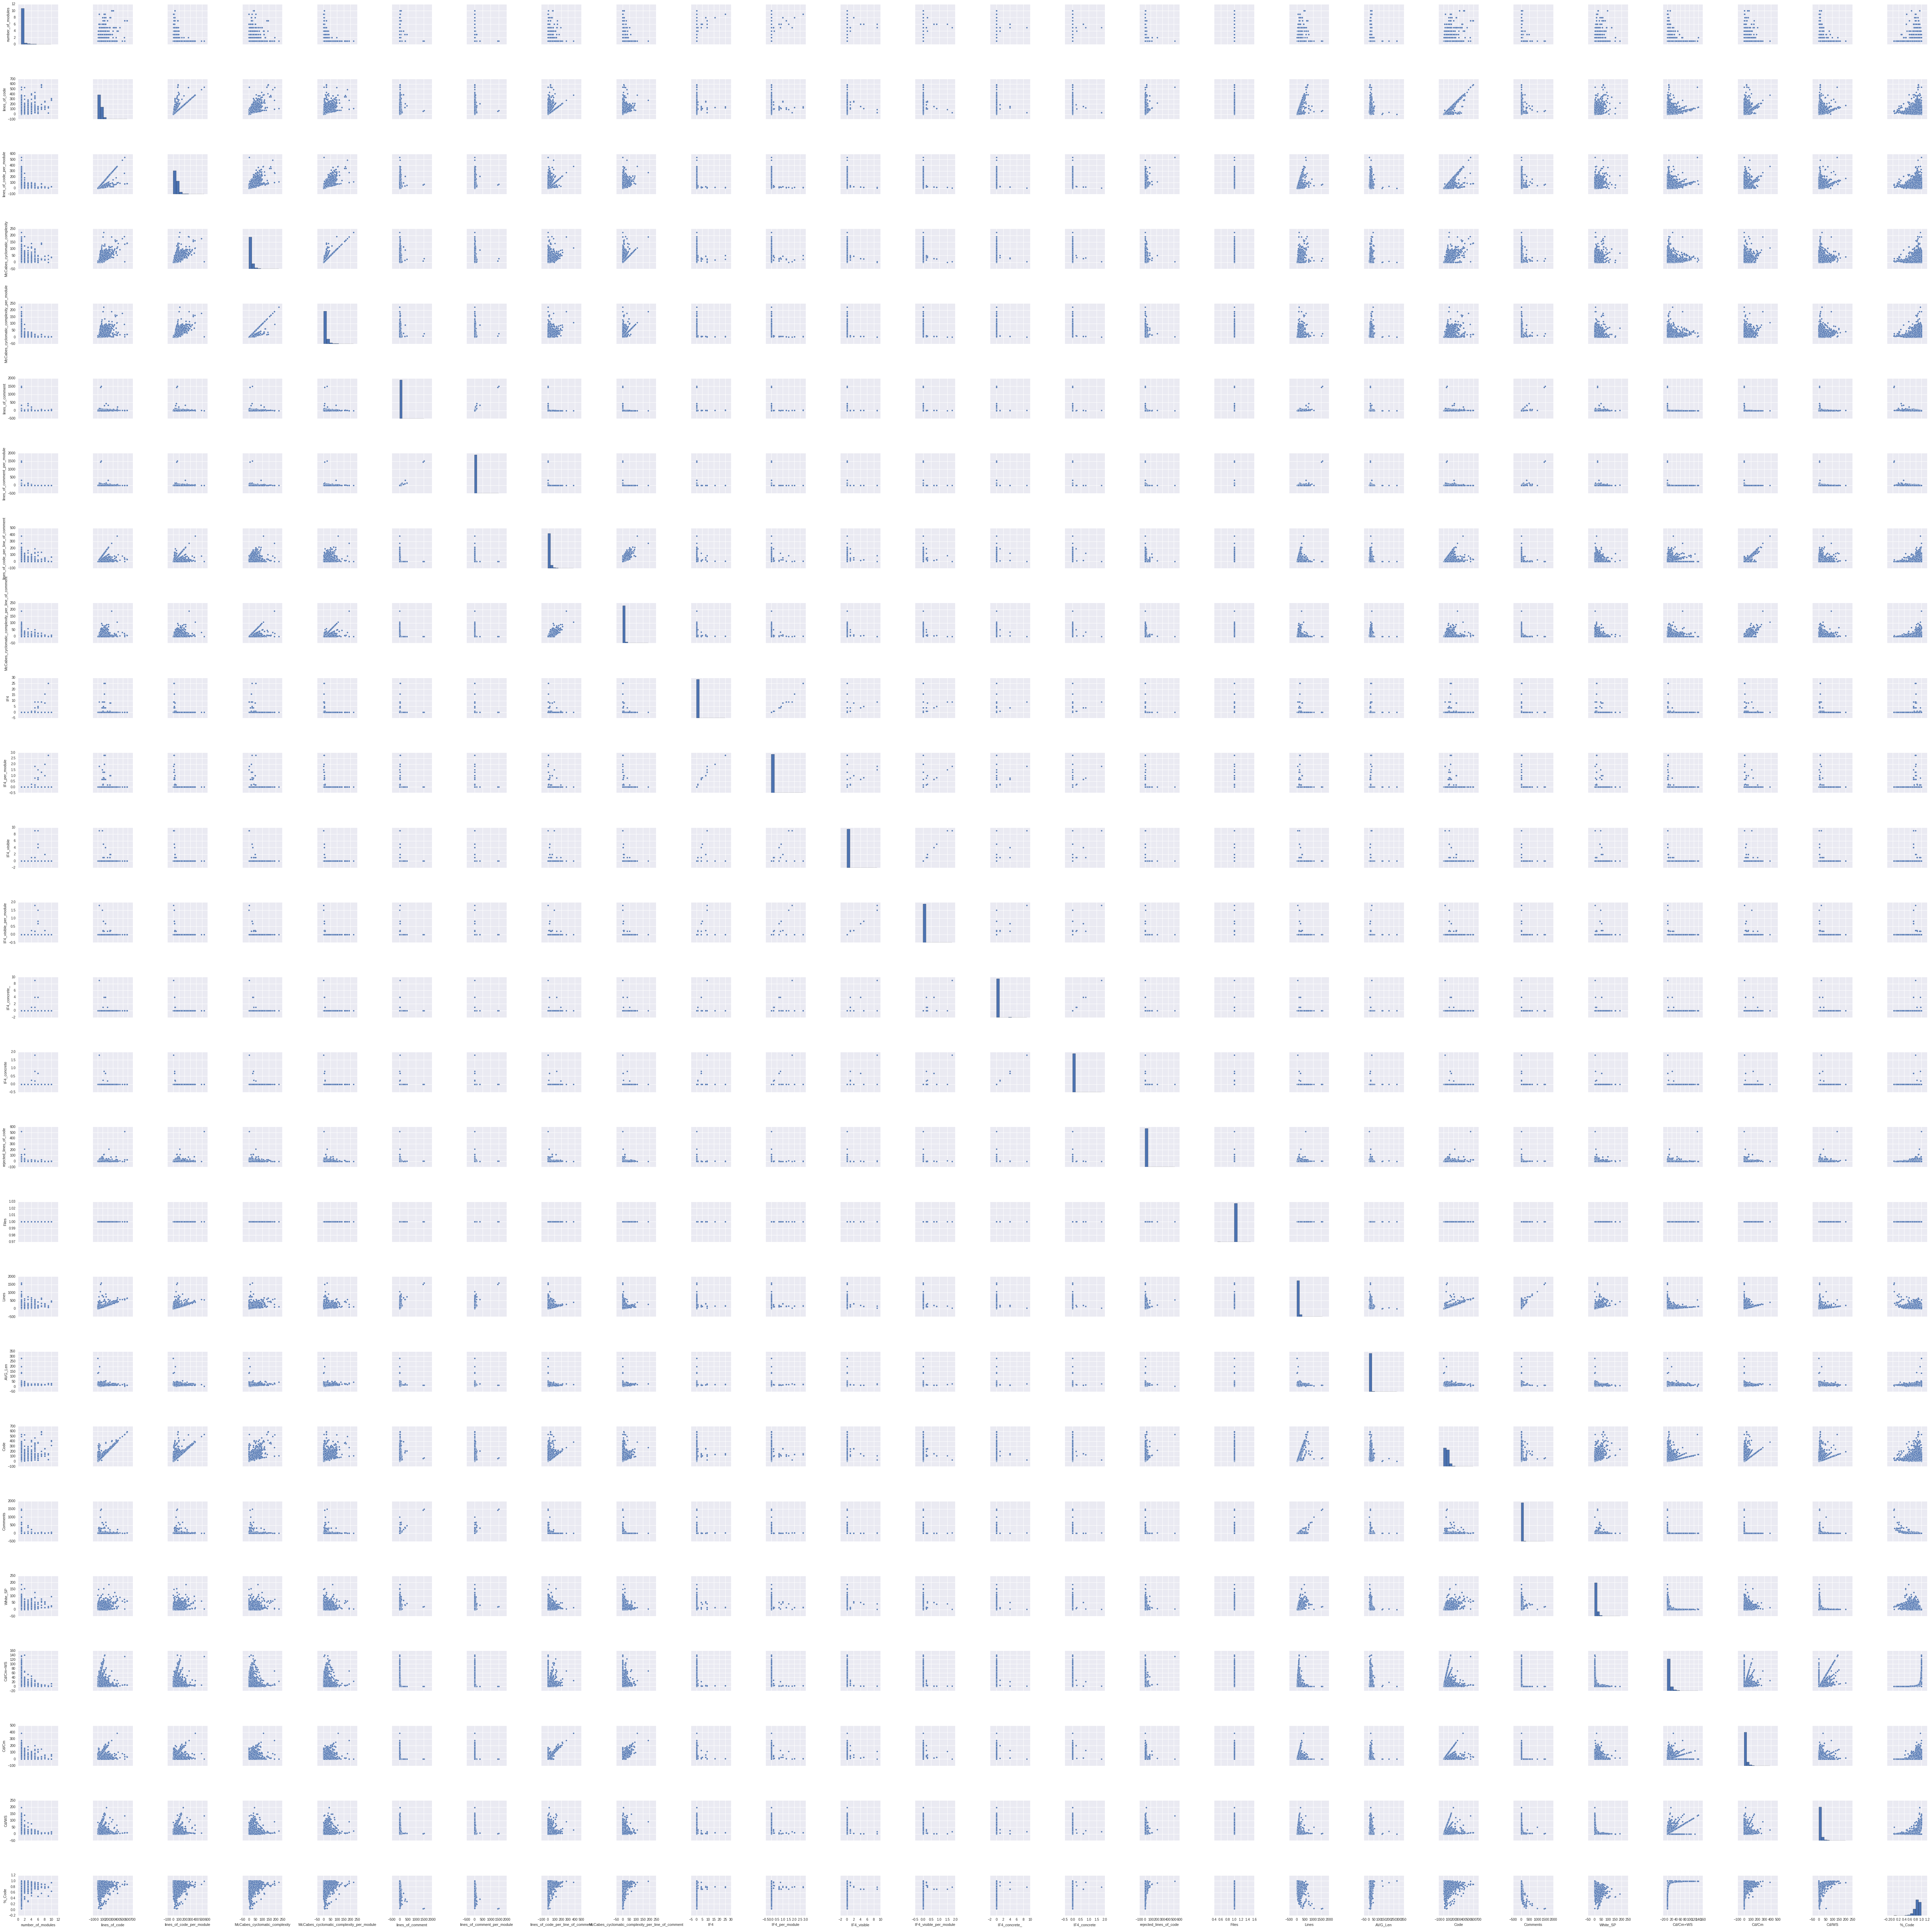

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

#df_before_feature_sel.columns = labels_reduced
sns.pairplot(df_before_feature_sel, size=3)
plt.show()

In [28]:
for i, label in enumerate(labels_reduced):
    print i, label

0 number_of_modules
1 lines_of_code
2 lines_of_code_per_module
3 McCabes_cyclomatic_complexity
4 McCabes_cyclomatic_complexity_per_module
5 lines_of_comment
6 lines_of_comment_per_module
7 lines_of_code_per_line_of_comment
8 McCabes_cyclomatic_complexity_per_line_of_comment
9 IF4
10 IF4_per_module
11 IF4_visible
12 IF4_visible_per_module
13 IF4_concrete_
14 IF4_concrete
15 rejected_lines_of_code
16 Files
17 Lines
18 AVG Len
19 Code
20 Comments
21 White SP
22 Cd/Cm+WS
23 Cd/Cm
24 Cd/WS
25 % Code


In [29]:
df_descriptions = df_before_feature_sel.describe()

for i in range(df_descriptions.shape[1]):
    #print labels_reduced[i]
    #print
    pass
print df_descriptions.T
#for i, feature in df_before_feature_sel.describe():
 #   print labels_reduced[i]
  #  print feature

                                                     count       mean  \
number_of_modules                                  19153.0   1.137420   
lines_of_code                                      19153.0  57.173445   
lines_of_code_per_module                           19153.0  53.077116   
McCabes_cyclomatic_complexity                      19153.0  15.203101   
McCabes_cyclomatic_complexity_per_module           19153.0  14.290222   
lines_of_comment                                   19153.0   3.352373   
lines_of_comment_per_module                        19153.0   3.064619   
lines_of_code_per_line_of_comment                  19153.0  11.793485   
McCabes_cyclomatic_complexity_per_line_of_comment  19153.0   3.087587   
IF4                                                19153.0   0.013314   
IF4_per_module                                     19153.0   0.001857   
IF4_visible                                        19153.0   0.002872   
IF4_visible_per_module                             

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components='mle', svd_solver='full')
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components='mle', random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [31]:
pca.transform(X[0][:])

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ -7.40634652e+01,   8.77247004e+00,  -8.55460882e+00,
          6.70734217e-01,   2.82862328e+00,  -1.51354685e+00,
          4.32975137e+00,   9.17037916e-01,  -8.64835787e-01,
         -5.94518112e-01,  -4.54120767e-01,  -4.62262229e-01,
          3.23754372e+00,  -1.16529491e-02,   5.59282669e-01,
          2.57770958e-02,  -5.18105857e-02,  -5.55397692e-02,
          5.35324286e-02,   1.77726490e-03,   3.08480412e-02,
         -2.54754780e-02,   3.29777541e-05,   1.18303475e-05,
         -2.83296515e-06]])

In [32]:
def save_dataset_to_file(file_name_X, file_name_y, X, y):
    np.savetxt(file_name_X, X)
    np.savetxt(file_name_y, y)

In [33]:
#save_dataset_to_file('X.txt', 'y.txt', X, y)

In [34]:
import numpy as np
def load_dataset_from_file(features, results):
    return np.loadtxt(features), np.loadtxt(results)

In [35]:
X, y = load_dataset_from_file('X.txt', 'y.txt')
print X.shape, y.shape

(19153, 26) (19153,)


In [36]:
# y is vector of labels
def create_labels(y):
    y_l = np.copy(y)
    for i in range(y.shape[0]):
        if y[i] >= 80: 
            y_l[i] = 5
        if y[i] >= 60 and y[i] < 80: 
            y_l[i] = 4
        if y[i] >= 40 and y[i] < 60:
            y_l[i] = 3
        if y[i] >= 20 and y[i] < 40:
            y_l[i] = 2
        if y[i] < 20: 
            y_l[i] = 1
    return y_l

In [37]:
y_labeled = create_labels(y)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_labeled, test_size=0.2, random_state=0)

In [50]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_features='log2')
rfc.fit(X_train, y_train)

print rfc.score(X_test, y_test)

0.683894544505


In [40]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train) 

print clf.score(X_test, y_test)

0.61863743148


In [41]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

print clf.score(X_test, y_test)

0.286609240407


In [42]:
from sklearn.model_selection import GridSearchCV
import multiprocessing
cores=multiprocessing.cpu_count()-2
"""
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100, 1000]}
svc = SVC()
clf = GridSearchCV(svc, parameters, n_jobs=cores, verbose=2)
clf.fit(X_train, y_train)
print clf.score(X_test, y_test)
"""

"\nparameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100, 1000]}\nsvc = SVC()\nclf = GridSearchCV(svc, parameters, n_jobs=cores, verbose=2)\nclf.fit(X_train, y_train)\nprint clf.score(X_test, y_test)\n"

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
print gbc.score(X_test, y_test)

0.334377447142


In [44]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
print abc.score(X_test, y_test)

0.29313495171


In [51]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=30)
etc.fit(X_train, y_train)
print etc.score(X_test, y_test)

0.678935003915


In [46]:
print X.shape, y.reshape((y.shape[0], 1)).shape

(19153, 26) (19153, 1)


In [47]:
#dataset = X#np.concatenate((X, y.T), axis=1)

dataset = np.concatenate((X,y[:,None]),axis=1)
#print X.shape[0] == y.shape[0]

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame(dataset)
#sns.pairplot(df)
#plt.show()